# Проектная работа "Приоритизация гипотез. Анализ A/B-теста"

## Введение

### Описание проекта

Отделом маркетинга крупного интернет-магазина подготовилен список гипотез для увеличения выручки. Требуется приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Цель проекта

1. Определить наиболее удачную гипотезу
2. Проанализировать итоги A/B-теста

### Ход решения

1. Загрузить файлы с данными и подготовить их к анализу.
2. Приоритизировать гипотезы
3. Проанализировать А/B-тест
4. Выводы.

### Описание данных

Структура /datasets/hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Структура /datasets/orders.csv:  
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Структура /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Изучение и подготовка данных

### Обзор данных о гипотезах, заказах и визитах

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv'),
    )
except FileNotFoundError:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv'),
    )
except:
    print('Проверьте путь к файлу')

In [3]:
for df in (hypothesis, orders, visitors):
    display(df.head(10))
    df.info()
    print('Количество дубликатов:', df.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество дубликатов: 0


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов: 0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов: 0


В данных отсутствуют дубликаты и пропуски. В названиях столбцов присутсвуют заглавные буквы и верблюжья нотация. Даты записаны в формате object.

Проверим, что в столбцах 'group' всего два варианта:

In [4]:
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


### Предобработка данных

In [5]:
#Приведем названия столбцов в корректный вид
hypothesis.columns = hypothesis.columns.str.lower()
orders.rename(columns={"transactionId":"transaction_id", 
                   "visitorId":"visitor_id"} ,inplace=True)

In [6]:
#Изменим тип данных для столбцов "date"
orders['date'] = orders['date'].map(lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))

C:\Users\User\AppData\Local\Temp\ipykernel_14604\3055692493.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  orders['date'] = orders['date'].map(lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))
C:\Users\User\AppData\Local\Temp\ipykernel_14604\3055692493.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  visitors['date'] = visitors['date'].map(lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))


In [7]:
#Проверим нет ли пользователей, которые попали в обе группы A/B-теста
unique_a_list = orders.query('group == "A"')['visitor_id'].unique()
unique_b_list = orders.query('group == "B"')['visitor_id'].unique()

ab_users = []
for x in unique_a_list:
    if x in unique_b_list:
        ab_users.append(x)
     
print('Количество пользователей, попавших в обе группы А/B-теста:',len(ab_users))

Количество пользователей, попавших в обе группы А/B-теста: 58


Для чистоты теста удалим этих пользователей.

In [8]:
#Определим в какие дни "неправильные" пользователи делалил заказы.
#Это нужно для определения сколько исключить просмотров в таблице visitors
ab_orders = orders.query('visitor_id in @ab_users')
ab_orders_per_date = ab_orders.groupby('date').agg({'visitor_id':'nunique'})
ab_orders_per_date.columns = ['wrong_visitors']


visitors = visitors.merge(ab_orders_per_date, left_on='date', right_on='date', how = 'left')
visitors['true_visitors'] = visitors['visitors'] - visitors['wrong_visitors']
visitors = visitors.drop(columns =['visitors','wrong_visitors']).rename(columns={"true_visitors":"visitors"})
print(visitors)

orders = orders.query('visitor_id not in @ab_users')
orders.info()

         date group  visitors
0  2019-08-01     A       715
1  2019-08-02     A       617
2  2019-08-03     A       505
3  2019-08-04     A       712
4  2019-08-05     A       752
..        ...   ...       ...
57 2019-08-27     B       711
58 2019-08-28     B       647
59 2019-08-29     B       524
60 2019-08-30     B       487
61 2019-08-31     B       713

[62 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Столбцы записаны правильно, столбцы 'date' переведены в формат datetime. Из таблиц orders и visitors исключено влияние пользователей, попавших в обе группы A/B-теста. Можно переходить к первой части "Приоритизация гипотез"

## Приоритизация гипотез

### Фреймфорк ICE для приоритизации гипотез

In [9]:
pd.options.display.max_colwidth = 210
hypothesis['ice'] = (
    hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
)
hypothesis[['hypothesis','ice']].sort_values(by='ice',ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


В топ-3 вошли гипотезы с индексами 8, 0, 7.

### Фреймфорк RICE для приоритизации гипотез

In [10]:
hypothesis['rice'] = (
    hypothesis['reach']*hypothesis['impact']
    *hypothesis['confidence']/hypothesis['efforts']
)
hypothesis[['hypothesis','rice']].sort_values(by='rice',ascending = False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Топ-3 изменился: теперь в нем гипотезы с индексом 7, 2, 0. При чем RICE у лидера с индексом 7 в два раза выше чем у гипотезы с индексом 2.

### Вывод

In [11]:
print(hypothesis.loc[7,'hypothesis'])

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


Первоначально для приоритизации гипотез использовался фреймфорк ICE, который выявил 3 гипотезы со значением ICE больше 10. При этому выбранная гипотеза с индексом 7 была на третьем месте. После применения фреймфорк ICE, стало понятно, что гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" является 100% победителем, так как RICE кратно превышает относительно остальных гипотез. Фреймворк RICE позволил учитывать охват пользователей и, исходя из результатов, гипотеза с индексом 7 имеет наибольший охват.

Для приоритизации гипотез использую фреймворки ICE и RICE, которые оценивают гипотезы по шкале. ICE расчитывается как произведение параметра Impact (влияение) и параметра Confidence (уверенность в оценке остальных параметрах), деленное на параметр Efforts (стоимость тестирования гипотезы). Фреймворк RICE является модификацией ICE, но он дополнительно учитывает параметр Reach (охват). Reach находится в числителе и его умножают на остальные параметры.

## Анализ A/B-теста

### Кумулятивная выручка по группам

In [12]:
dates_groups = orders[['date','group']].drop_duplicates()

orders_agg = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
          .agg({'date':'max','group':'max','transaction_id' : 'nunique','visitor_id':'nunique','revenue':'sum'}),
          axis=1)
    .sort_values(by=['date','group'])
)
visitors_agg = (
    dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
          .agg({'date':'max','group':'max','visitors':'sum'}),
          axis=1)
    .sort_values(by=['date','group'])
)

cumulative_data = orders_agg.merge(visitors_agg, left_on = ['date','group'], right_on = ['date','group'])
cumulative_data.columns = ['date','group','orders','buyers','revenue','visitors']
    
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,715
1,2019-08-01,B,17,17,59758,709
2,2019-08-02,A,42,36,234381,1332
3,2019-08-02,B,40,39,221801,1288
4,2019-08-03,A,66,60,346854,1837
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17569
58,2019-08-30,A,460,437,3311413,17895
59,2019-08-30,B,531,511,4955833,18056
60,2019-08-31,A,468,445,3364656,18589


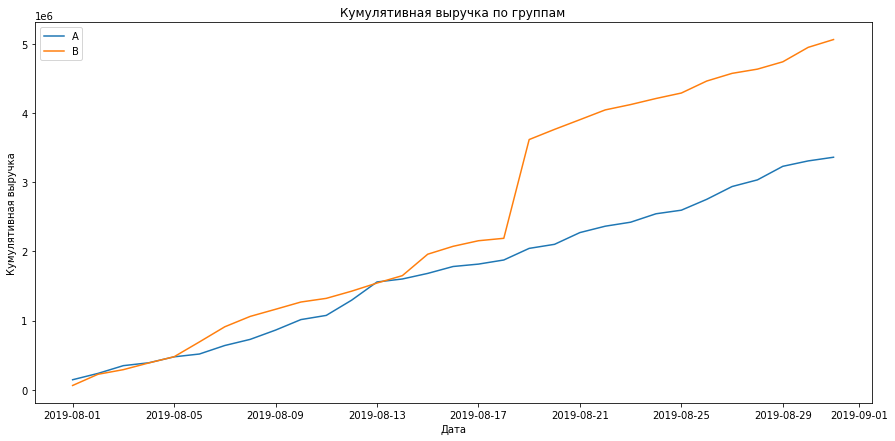

In [13]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue','orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue','orders']]

plt.figure(figsize=(15, 7))
plt.plot(cumulative_revenue_a['date'],cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'],cumulative_revenue_b['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по группам')

plt.legend();

Выручка у обеих групп растет. После 2019-08-05 группа B лидирует над группой А по выручке. После 19.08.2021 группы В значительно увеличила разрыва с группой А. У обеих групп видны всплески: у группы А между 11 и 12 августа 2019, у группы В между 18 и 19 августа 2019. 

### Кумулятивный средний чек по группам

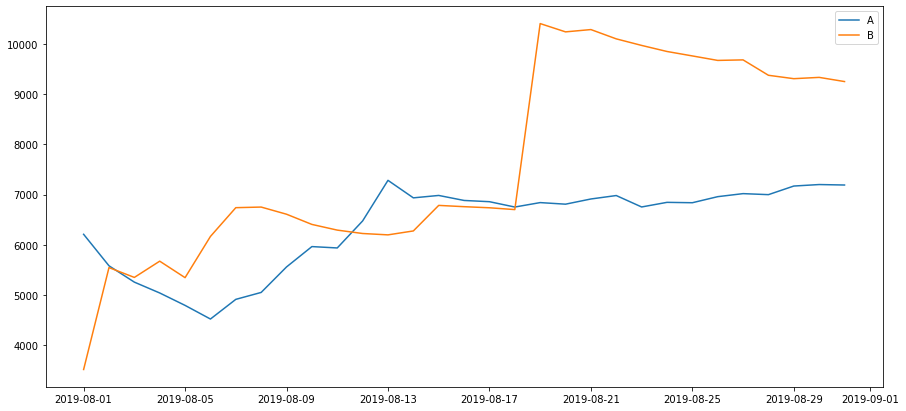

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(cumulative_revenue_a['date'],cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'],cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.legend()

По графику видно ,что в начале периода видны большие колебания данных. У группы А средний чек становится стабильным после 14 августа 2021 и находится около 7000. У группы В данные колеблются до 15.08.2021 , но затем происходит резкий скачек с 18 по 19 августа и кривая идёт на понижение. Нельзя сказать однозначно, что кривые стабилизировались к 30.08.2021г, но тенденция к равномерности пристутсвует.

### Относительное изменение кумулятивного среднего чека группы B к группе A

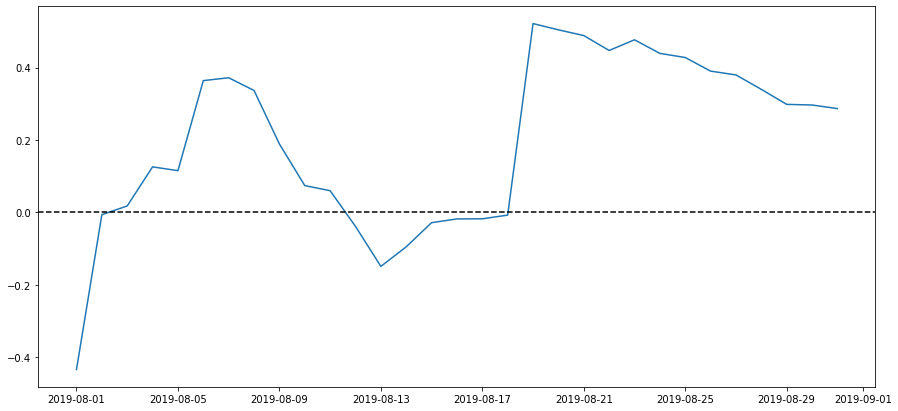

In [15]:
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes = ['A','B']
)

plt.figure(figsize=(15, 7))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
         /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках график различия между группами по среднему чеку "скачет". Но большую часть времени средний чек группы В преобладает над средним чеком группы А. Резкие скачки на графике снова указывают на аномально большие заказы.

### Кумулятивная конверсия по группам

(18109.0, 18140.0, 0.0, 0.04)

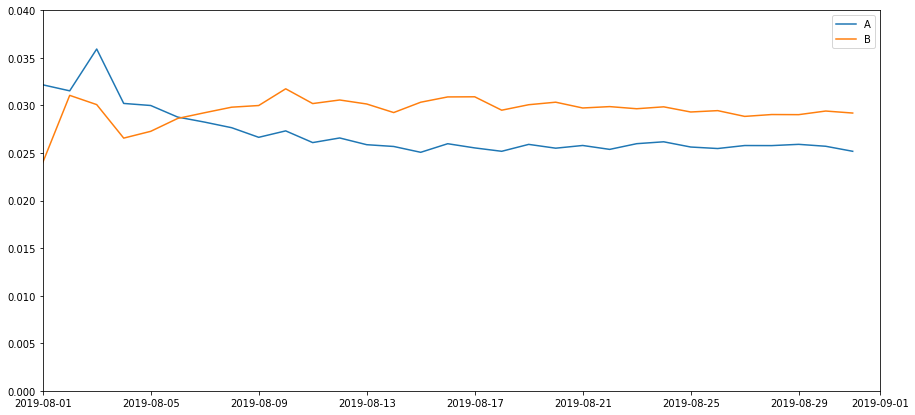

In [16]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(15, 7))
plt.plot(cumulative_data_a['date'],cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'],cumulative_data_b['conversion'], label='B')
plt.legend()

plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), 0, 0.04])

В первые 5 дней конверсия сильно колебалась в обеих группах, после 07.08.2019 конверсия группы B обогнала конверсию группы А. После этого данные практически стабилизировались: конверсия группы А около 0.025, конверсия группы В около 0.03. 

### Относительное изменение кумулятивной конверсии группы B к группе A

(18109.0, 18140.0, -0.4, 0.4)

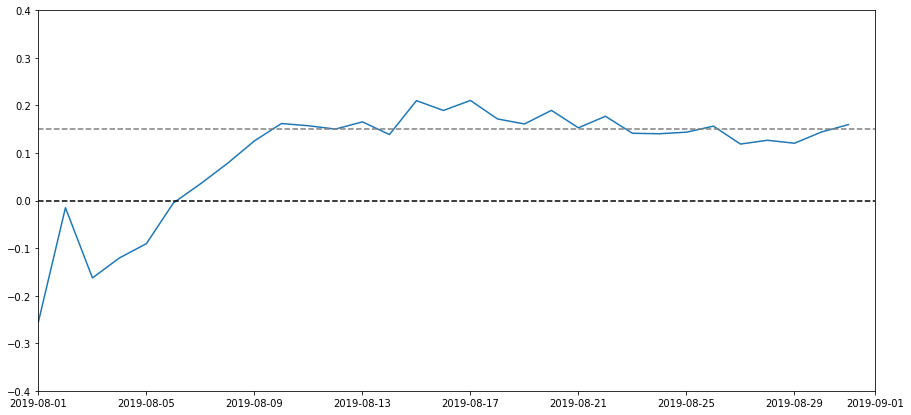

In [17]:
merged_cumulative_conversion = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],left_on='date', right_on='date', how='left', suffixes = ['A','B'] 
)

plt.figure(figsize=(15, 7))
plt.plot(merged_cumulative_conversion['date'],
         merged_cumulative_conversion['conversionB']/merged_cumulative_conversion['conversionA']-1,
         label='Относительный прирост конверсии группы В относительно группы А'
)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')


plt.axis([dt.datetime.strptime('2019-08-01', '%Y-%m-%d'), dt.datetime.strptime('2019-09-01', '%Y-%m-%d'), -0.4, 0.4])

Судя по графику, до 06 августа 2019 года группа В значительно проигрывала группе А по конверсии. После этой даты конверсия группы обгоняла группу А и стабилизировалась около 0.15. Нам ещё предстоит провести анлиз аномалий, но на данный момент гипотеза работает.

### Количество заказов по пользователям

In [18]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users.columns = ['user_id','orders']
orders_by_users.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


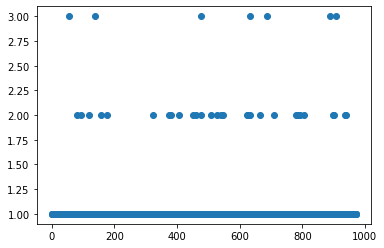

In [19]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])

У большинства пользоватлей по одному заказу, есть пользователи с двумя заказами. Пользователи с 3 заказами являются редкостью, скорее всего это "аномальные" пользователи. Возможно пользователи с 2 заказами, тоже станут "аномальными", но пока об этом говорить рано.

### 95-й и 99-й перцентили количества заказов на пользователя. Аномальные пользователи

In [20]:
print(np.percentile(orders_by_users['orders'],[90, 95, 99]))

[1. 1. 2.]


Только у 1% пользователей больше 1 заказа. Аномальные заказами будем считать заказы равные 2 и более.

### Точечный график стоимостей заказов

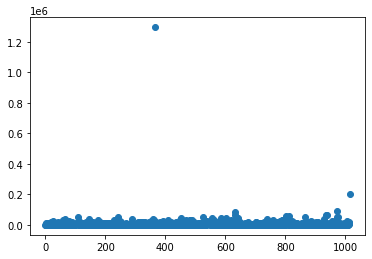

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

На первый взгляд мы видим две явные аномалии: две точки около 1,3 млн. и около 200 тыс. У большинства стоимость заказа составляла менее 100 тыс. Возможно, К аномалиям будут отнесены значения и меньше.

###  95-й и 99-й перцентили стоимости заказов. Аномальные заказы

In [22]:
print(np.percentile(orders['revenue'],[90, 95, 99]))

[17990. 26785. 53904.]


У 90% пользователей стоимость заказа не доходит до 18 тыс. К аномалиям отнесем заказы 1-5%, а именно свыше 30000.

### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Прежде всего сформулируем гипотезу.  
Нулевая гипотеза: различий в среднем количестве заказов между группами нет.  
Алтернативная гипотеза: различия в среднем чеке между группами есть.

In [23]:
#Отфильтруем пользователей по группам
visitors_a = visitors[visitors['group'] == 'A']
visitors_b = visitors[visitors['group'] == 'B']

#Сгруппируем уникальные заказы по покупателям
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users_a.columns = ['user_id','orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users_b.columns = ['user_id','orders']

In [24]:
#Объявим переменные, в которых пользователи из разных групп будет соответствовать количество заказов.
#Для тех, кто ничего не заказывал, значение "количество заказов" будет равно 0.
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a['visitors'].sum()-len(orders_by_users_a['orders'])
            ),
            name = 'orders'
        ),
    ],
    axis=0
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b['visitors'].sum()-len(orders_by_users_b['orders'])
            ),
            name = 'orders'
        ),
    ],
    axis=0
)

print('P-value:',stats.mannwhitneyu(sample_a, sample_b)[1])
print('Относительный прирост среднего чего группы В относительно группы А: {0:.3f}'.format(sample_b.mean()/sample_a.mean() - 1))

P-value: 0.011047912824911445
Относительный прирост среднего чего группы В относительно группы А: 0.160


Исходя из "сырых" данных, можно сделать вывод, что нулевую гипотезу можно отвергнуть. P-значение составило 0.011, что меньше статистической значимости в 0.05.  
Относительный выигрыш группы В по количеству заказов относительно группы А составил 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Прежде всего сформулируем гипотезу.  
Нулевая гипотеза: различий в среднем количестве заказов между группами нет.  
Алтернативная гипотеза: различия в среднем чеке между группами есть.

In [25]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],orders[orders['group'] == 'B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

0.829
0.287


Оснований отвергать нулевую гипотезу нет, так как статистическая значимость не достигнута: значение Р-значения 0.829 больше 0.05. Другими словами, статистически значимых различий в среднем чеке между группами нет.  
При этом относительный выигрыш группы В относительно группы А составил 28.7%.

### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

In [26]:
#Примем переменны для сверхбольшого количества заказов и сверхдорого заказа
ab_order = 1
ab_cost = 30000

In [27]:
#Определим аномальных пользователей

users_too_much_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders']>ab_order]['user_id'],
        orders_by_users_b[orders_by_users_b['orders']>ab_order]['user_id']
    ],
    axis=0,
)

users_too_expensive_orders = orders[orders['revenue']>ab_cost]['visitor_id']

abnormal_users = (
    pd.concat([users_too_much_orders, users_too_expensive_orders],axis=0)
)

display(abnormal_users.head())
print('Количетсво аномальных пользователей:', abnormal_users.shape[0])

36      366673373
58      611059232
64      678354126
72      759473111
171    1617417821
dtype: int64

Количетсво аномальных пользователей: 78


In [28]:
sample_a_filtr = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a['visitors'].sum()-len(orders_by_users_a['orders'])
            ),
            name = 'orders'
        ),
    ],
    axis=0
)

sample_b_filtr = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b['visitors'].sum()-len(orders_by_users_b['orders'])
            ),
            name = 'orders'
        ),
    ],
    axis=0
)

print('{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtr, sample_b_filtr)[1]))
print('{0:.3f}'.format(sample_b_filtr.mean()/sample_a_filtr.mean() - 1))

0.013
0.180


Результат после очитски от аномалий не изменился: p-значение < статистической значимости. Гипотезу об отсутствии различий отвергаем.  
Выигрыш по количеству заказов группы В увеличился до 18% относительно группы А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [29]:
print(
    '{:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']
        )[1]
    )
)

print(
    '{:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        /orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        -1
    )
)

0.829
0.011


После очистки данных, выявили выигрыш по среднему чеку группы В относительно группы А в 1.1%.  
Судя по Р-значению, равному 0.829, это не явлется значимой разницей, так как не достигло статистической значимости в 0.05. Основания для отвергания нулевой гипотезы нет.

## Выводы

- График различия среднего чека между группами сообщает, что результаты группы В лучше группы А, но есть тенденция к спаду.
- График различия конверсии между группами демонстрирует, что результаты группы B улучшались с каждым днем и стабилизировались на 15% относительно группы А.
- Статистическая значимость различий в среднем количестве заказов между группами по "сырым" и «очищенным» данным присутствует. Выигрыш группы В относительно группа А по "очищенным" данным составил 28.7%
- Статистическая значимость различий в среднем чеке заказа между группами по "сырым" и «очищенным» данным отсутствует.


Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Можно полагать, что применив гипотезу «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок», компания не увеличит средний чек, но значительно повысит конверсию продаж. 
